## Initial Parameters

In [27]:
INPUT_DIR = '../../data/generated_data/model_progan_2022.05.13.13.43.18'
p = 0.5928
L = 128
OUPUT_DIR = 'out_stat'

In [28]:
import os
import glob
import numpy as np
import geometric_measure
import matplotlib.pyplot as plt

if not os.path.exists(INPUT_DIR):
    print('There is no such path:', INPUT_DIR)
filelist = glob.glob(INPUT_DIR + '/' + f'fake_L={L}_p={p}_*.npy')

os.makedirs(OUPUT_DIR, exist_ok=True)

import importlib
importlib.reload(geometric_measure)   

<module 'geometric_measure' from '/Users/ebi/Desktop/Sims/Git/Improving-critical-exponents_pytorch/src/statphy/geometric_measure.py'>

# Clustering the Input Images

<Figure size 432x288 with 0 Axes>

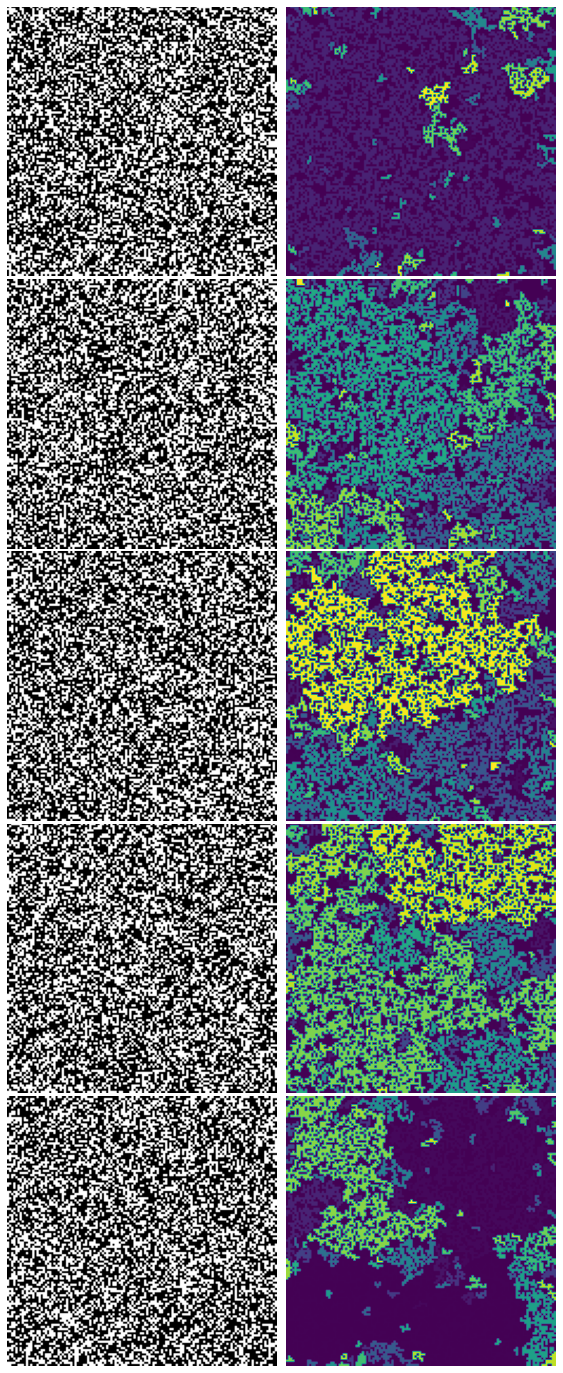

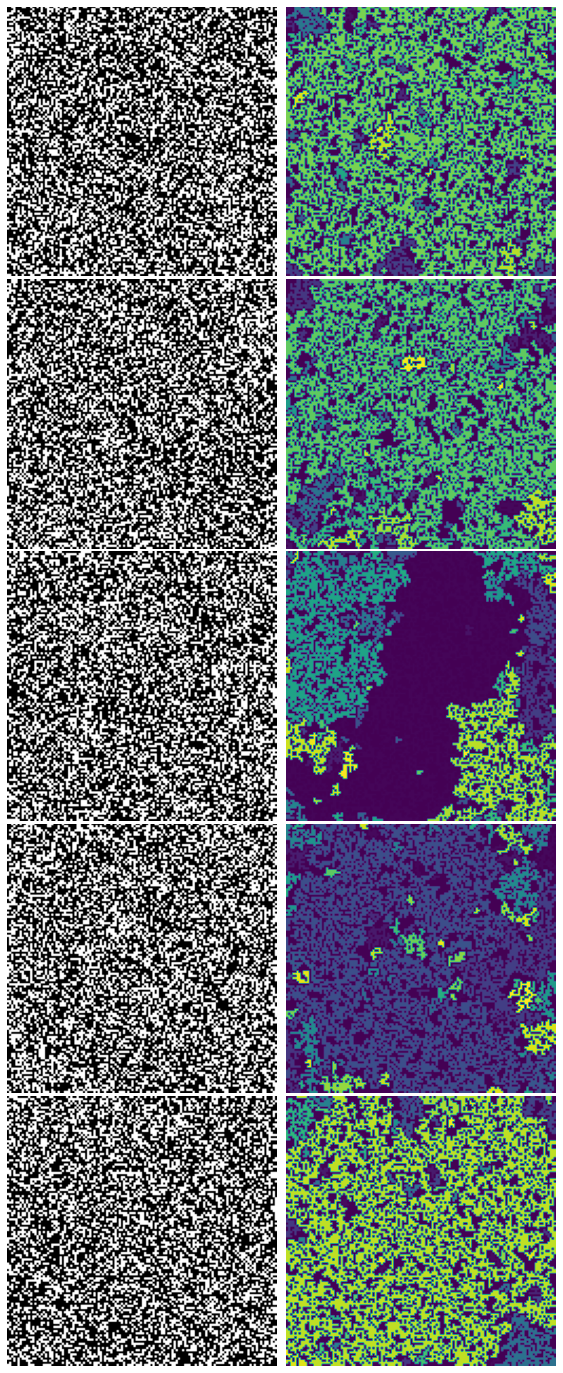

In [29]:
n_samples = 5
imgs_fake = [np.load(path) for path in filelist[:n_samples]]
np.random.seed(72)
imgs_real = [ (np.random.random(size=(L,L)) < p).astype(int) for i in range(n_samples) ]

def plot_imgs_labels(imgs, labels, outfilename):
    nrows = len(imgs)
    plt.figure(figsize=(2*5, nrows*5))
    plt.subplots_adjust(wspace=0, hspace=0.01)
    
    for i, img in enumerate(imgs):
        plt.subplot(nrows, 2, 2*i + 1)
        plt.imshow(img, cmap='Greys',)
        plt.axis('off')
        plt.subplot(nrows, 2, 2*i + 2)
        label = labels[i]
        plt.imshow(label,)
        plt.axis('off')
    if outfilename:
        plt.savefig(outfilename, pad_inches=0.05, bbox_inches='tight') #

# now plot some samples
plt.figure(1)
labels_real, _ = geometric_measure.clustering(imgs_real, lower_size=5)
plot_imgs_labels(imgs_real, labels_real, outfilename=f'{OUPUT_DIR}/imgs_real(L={L}).pdf')

plt.figure(2)
labels_fake, _ = geometric_measure.clustering(imgs_fake, lower_size=5)
plot_imgs_labels(imgs_fake, labels_fake, outfilename=f'{OUPUT_DIR}/imgs_fake(L={L}).pdf')

# Statistics

In [30]:
import fit 
def logplotXY(plt, x, y, xlabel, ylabel, title=None, outfilename=None,
              xlow = 1e1, xup = 1e3,
              slope_st = '\\tau',):
              
    plt.loglog(x, y, ls='', marker='o', fillstyle='none', 
               markersize = 5,
               label = 'sim')

    # plot slope
    indx = (x >= xlow) & (x <= xup)
    x, y = x[indx], y[indx]
    expo, c, expo_err, c_err = fit.loglog_slope(x, y)
    xn = np.logspace(np.log10(x[0]), np.log10(x[-1]))
    yn = c * xn ** expo
    expo_usign = expo if expo > 0 else -expo
    plt.loglog(xn, yn, color='k', lw=1,
               label = fr'${slope_st}={expo_usign:.2f} \pm {expo_err:.2f}$'  )
    ###
    plt.legend(frameon=False)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel, fontsize=16)
    if ylabel:
        plt.ylabel(ylabel, fontsize=16)
    if outfilename:
        plt.savefig(outfilename, pad_inches=0.01, bbox_inches='tight')

### Real images

In [31]:
import gen_class

def make_perc_arr(L, p):
    def F():
        return (np.random.random(size=(L,L)) < p).astype(int)
    return F

In [33]:
n_samples = 1000
np.random.seed(72)
L = 128
img_gen_real = gen_class.GenUsingFunc(make_perc_arr(L, p), n_samples)

# get the mesures related to the configurations
measure_real = geometric_measure.get_measure(img_gen_real, img_shape=(L, L))
# get the statistics of measures
stat_real = geometric_measure.measure_statistics(measure_real, nbins_for_ns=43)

100%|██████████| 1000/1000 [01:26<00:00, 11.57it/s]


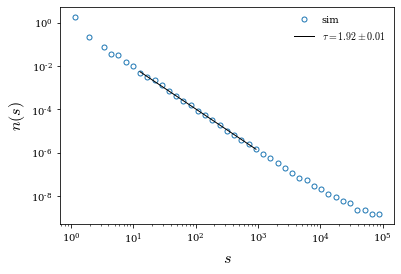

In [50]:
ns = stat_real['ns']
x, y, dx = ns['bin_centers'], ns['hist'], ns['bin_sizes']
logplotXY(plt, x, y, '$s$', '$n(s)$', xlow = 1e1, xup = 1e3, slope_st = '\\tau',
          outfilename = f'{OUPUT_DIR}/ns_real(L={L},N={n_samples})2.pdf',
          
          )

### Fake images

In [32]:
n_samples = 1000
img_gen_fake = gen_class.GenUsingFile(filelist, n_samples)
measure_fake = geometric_measure.get_measure(img_gen_fake)
stat_fake = geometric_measure.measure_statistics(measure_fake, nbins_for_ns=43)

100%|██████████| 10000/10000 [16:57<00:00,  9.83it/s]


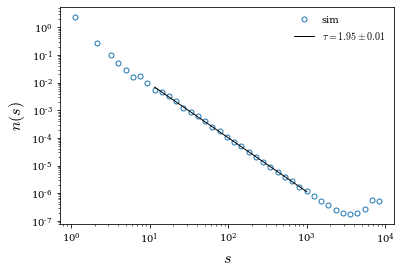

In [33]:
ns = stat_fake['ns']
x, y, dx = ns['bin_centers'], ns['hist'], ns['bin_sizes']
logplotXY(plt, x, y, '$s$', '$n(s)$', f'{OUPUT_DIR}/ns_fake(L={L},N={n_samples}).pdf')